In [23]:
import pandas as pd

train_df = pd.read_csv("train1.csv", nrows=10000)
train_df.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79


In [24]:
### 필요없는 columns빼기 unused 그리고 clik은 레이블로 가져가기
unused_columns,label_column = ["id", "hour", "device_id", "device_ip"], "click"

In [25]:
train_df = train_df.drop(unused_columns, axis=1)
train_df

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,84ebbcd4,1,0,17654,300,250,1994,2,39,100083,33
9996,1,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,d787e91b,1,0,15701,320,50,1722,0,35,-1,79
9997,1,1005,1,5ee41ff2,17d996e6,f028772b,ecad2386,7801e8d9,07d7df22,d7fe30a4,1,0,16920,320,50,1899,0,431,-1,117
9998,0,1005,0,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,0f2161f8,2cd8ff6d,1,0,21611,320,50,2480,3,297,100111,61


In [26]:
X_dict_train = list(train_df.drop(label_column, axis=1).T.to_dict().values())
y_train = train_df[label_column]

In [27]:
test_df = pd.read_csv("train1.csv", header=0, skiprows=(1, 10000), nrows=10000)

In [28]:
test_df = test_df.drop(unused_columns, axis=1)

In [29]:
X_dict_test = list(test_df.drop(label_column, axis=1).T.to_dict().values())

In [30]:
y_test = test_df[label_column]

In [31]:
##희소행렬이 만들어짐
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=True)

In [32]:
X_train = vectorizer.fit_transform(X_dict_train)

In [33]:
X_train.toarray()[:5]

array([[ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 18993.,   320., ...,     0.,     0.,     0.]])

In [34]:
X_test = vectorizer.fit_transform(X_dict_test)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
parameters = {"max_depth": [3, 10, None]}

In [37]:
decision_tree = DecisionTreeClassifier(criterion="gini", min_samples_split=30)


In [38]:
from sklearn.model_selection import GridSearchCV
grid_search =GridSearchCV(decision_tree, parameters, n_jobs= -1, cv=3, scoring="roc_auc" )

In [42]:
grid_search.fit(X_train, y_train)
decision_tree_best = grid_search.best_estimator_

In [43]:
# export_graphviz함수에 tree모델 지정 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(decision_tree_best, 
               out_file = None,
               feature_names=vectorizer.feature_names_,
               class_names=["0","1"], # click 유무 0.무, 1.유 
               rounded=True, # box를 round하게 
               filled=True, 
               impurity=True)

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

graph.write_png("ctr_decision_tree.png")

from IPython.core.display import Image
Image("ctr_decision_tree.png")

InvocationException: Program terminated with status: 1. stderr follows: 'C:\Users\Mr.' is not recognized as an internal or external command,
operable program or batch file.


y_pred =  [0 0 0 ... 0 0 0]
acc =  0.8412
confus =  [[8230   64]
 [1524  182]]


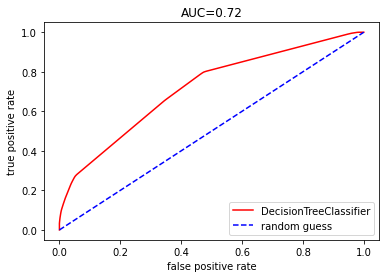

In [44]:
y_pred = decision_tree_best.predict(X_test)
print("y_pred = ", y_pred)

from sklearn.metrics import accuracy_score
print("acc = ", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print("confus = ", confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = decision_tree_best.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, "r-", label="DecisionTreeClassifier")
plt.plot([0,1], [0,1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right")